In [25]:
import pandas as pd

In [26]:
from nsepy import get_history as gh
import datetime as dt

In [27]:
import yfinance as yf
import datetime as dt

symbol = 'TATACOFFEE.NS'
start = '2013-01-01'
end ='2021-01-10'

# Retrieve historical stock data from Yahoo Finance
stock_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [28]:
stock_data=stock_data[["Open", "High", "Low", "Close"]]

In [29]:
stock_data

,Open,High,Low,Close
Date,,,,
2013-01-01,141.059998,142.789993,140.830002,141.509995
2013-01-02,142.100006,162.660004,141.615005,160.740005
2013-01-03,163.255005,167.389999,161.304993,162.619995
2013-01-04,162.774994,162.774994,157.460007,157.904999
2013-01-07,158.000000,163.949997,156.550003,159.565002
...,...,...,...,...
2021-01-04,109.000000,110.000000,107.550003,108.699997
2021-01-05,107.550003,108.699997,106.500000,107.849998
2021-01-06,108.000000,108.849998,106.000000,106.650002


In [30]:
column="Close"

In [31]:
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1=Ms.fit_transform(stock_data[[column]])
print("Len:",data1.shape)

Len: (1978, 1)


In [32]:
len(data1)

1978

In [33]:
training_size=round(len(data1)*0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)

1582
X_train length: (1582, 1)
X_test length: (396, 1)
X_train length: (1582, 1)
X_test length: (396, 1)


In [34]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    #print(i)
    for td in trends:
        #print(td)
        #trendslist.append(td)
        model=AutoReg(X_train, lags=i,trend=td)
        model_fit=model.fit()
        #make prediction
        y_pred=model_fit.predict(len(X_train),len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        from stockFunctions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(y_test,y_pred)
        print("*****************")

Lag=1,Trend=n
RMSE-Testset: 0.1478722688976287
maPe-Testset: 2854846182748.7407
*****************
Lag=1,Trend=t
RMSE-Testset: 0.1794325168847761
maPe-Testset: 5246629744559.526
*****************
Lag=1,Trend=c
RMSE-Testset: 0.13502828531353936
maPe-Testset: 4550841378527.06
*****************
Lag=1,Trend=ct
RMSE-Testset: 0.15833188336759174
maPe-Testset: 4999120044292.937
*****************
Lag=2,Trend=n
RMSE-Testset: 0.15866200589693372
maPe-Testset: 2664110614976.524
*****************
Lag=2,Trend=t
RMSE-Testset: 0.22853228092089742
maPe-Testset: 5911101392588.031
*****************
Lag=2,Trend=c
RMSE-Testset: 0.13772267619755077
maPe-Testset: 4602917426092.768
*****************
Lag=2,Trend=ct
RMSE-Testset: 0.18956017348885945
maPe-Testset: 5491868488840.939
*****************
Lag=3,Trend=n
RMSE-Testset: 0.15798589175183644
maPe-Testset: 2676936897268.3413
*****************
Lag=3,Trend=t
RMSE-Testset: 0.22685997659579918
maPe-Testset: 5888697247748.453
*****************
Lag=3,Trend=c
RMSE-

In [35]:
len(y_pred)

396

In [36]:
i=1
td='ct'
model=AutoReg(X_train,lags=i,trend=td)
model_fit=model.fit()
#make prediction
y_pred=model_fit.predict(len(X_train),len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("***********")

Lag=1,Trend=ct
RMSE-Testset: 0.15833188336759174
maPe-Testset: 4999120044292.937
***********


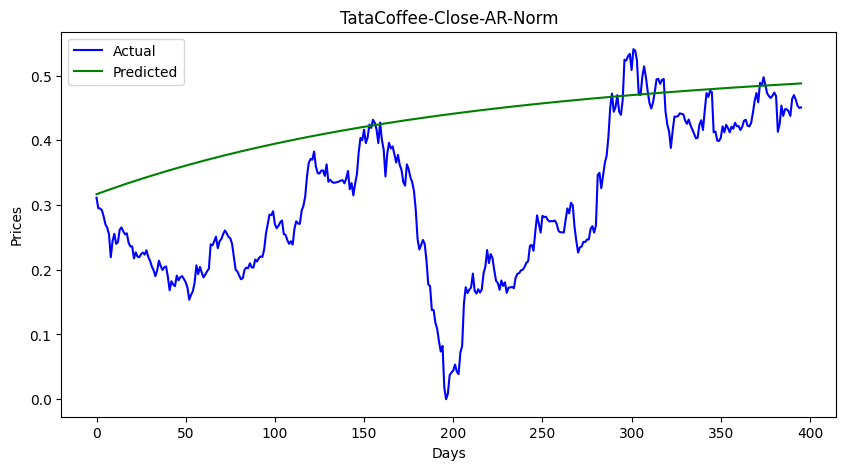

In [37]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [44]:
actual_stock_price_test_oriA = [1.0, 2.0, 3.0, 4.0, 5.0]
predicted_stock_price_test_oriP = [1.1, 2.2, 3.3, 4.4, 5.5]

from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA, predicted_stock_price_test_oriP)

RMSE-Testset: 0.3316624790355401
maPe-Testset: 0.10000000000000005


In [45]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 0.3316624790355401
maPe-Testset: 0.10000000000000005


In [46]:
forecast=model_fit.predict(len(data1),len(data1)+3)
forecast

array([0.48792584, 0.48808289, 0.48823939, 0.48839535])

In [47]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["closefore"])

In [48]:
forecast_stock_price_test_oriF

,closefore
0,111.000635
1,111.020463
2,111.040221
3,111.059911


In [42]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

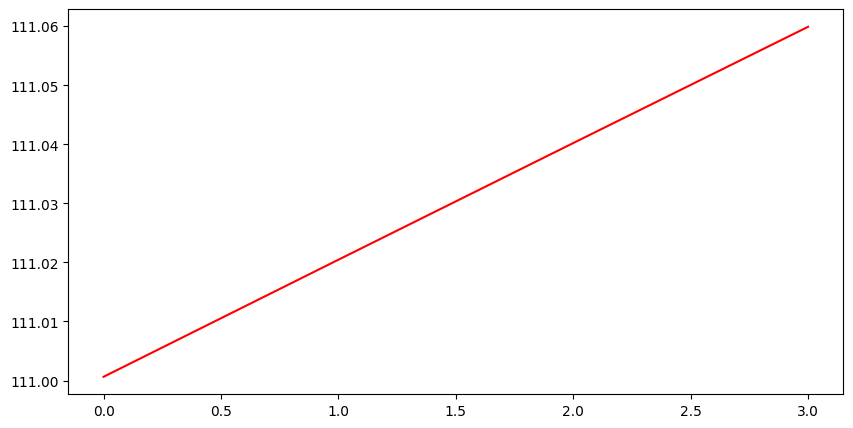

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145],color='blue',label="Actual")
plt.plot(forecast_stock_price_test_oriF,color='red',label="Predicted")